<a href="https://colab.research.google.com/github/ItzelPF/Visualizacion_Datos/blob/main/NetFlix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas matplotlib seaborn plotly
#!pip install --upgrade pandas seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ItzelPF/Visualizacion_Datos/refs/heads/main/NetFlix.csv', sep = ',' )

In [4]:
print(df['date_added'].head())

0    14-Aug-20
1    15-Dec-17
2     5-Jan-19
3     1-Mar-16
4     3-Dec-18
Name: date_added, dtype: object


In [5]:
#Intentamos covertir directamente, capturando errores
try:
    df['date_added'] = pd.to_datetime(df['date_added'])
except ValueError:
  # Si falla, intentamos con un formato especifico
    df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

<ipython-input-5-8a3d65db10ff>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


In [6]:
print(df['date_added'].dtype)

datetime64[ns]


In [7]:
#Mostrar las primeras filas para verificar la coversión
print(df['date_added'].head())

#Si hay valores NaT (Not a time) despues de la coversión, los podemos identificar así:
print(df['date_added'].isna().sum())

0   2020-08-14
1   2017-12-15
2   2019-01-05
3   2016-03-01
4   2018-12-03
Name: date_added, dtype: datetime64[ns]
10


In [9]:
#Definir un diccionario de mapeo de ratings a valores numericos
rating_map = {
    'G': 1,
    'PG': 2,
    'PG-13': 3,
    'R': 4,
    'NC-17': 5,
    'TV-Y': 1,
    'TV-Y7': 2,
    'TV-G': 1,
    'TV-PG': 2,
    'TV-14': 3,
    'TV-MA': 4
}

In [10]:
#Crear una nueva columna rating numeric con valores covertidos
df['rating_numeric']= df['rating'].map(rating_map)

In [11]:
#Crear una nueva columna rating numeric con valores covertidos
df['rating_numeric']= df['rating'].map(rating_map).fillna(0)

#Mostrar las primeras filas para verificar la conversión
print(df[['rating','rating_numeric']].head())

#Obtener estadisticas bascias de la nueva columna numerica
print(df['rating_numeric'].describe())

  rating  rating_numeric
0  TV-MA             4.0
1  TV-MA             4.0
2  TV-PG             2.0
3      R             4.0
4   TV-G             1.0
count    7787.000000
mean        3.112752
std         0.996720
min         0.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: rating_numeric, dtype: float64


In [12]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


In [13]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,int64


In [14]:
#PARA VARIABLES NUMERICAS
numeric_columns = ['release_year','duration','rating_numeric']
print("Estadisticas descriptivas para variables numericas")
print(df[numeric_columns].describe())

Estadisticas descriptivas para variables numericas
       release_year     duration  rating_numeric
count   7787.000000  7787.000000     7787.000000
mean    2013.932580    69.122769        3.112752
std        8.757395    50.950743        0.996720
min     1925.000000     1.000000        0.000000
25%     2013.000000     2.000000        3.000000
50%     2017.000000    88.000000        3.000000
75%     2018.000000   106.000000        4.000000
max     2021.000000   312.000000        5.000000


# **Medidad de tendencia central**

In [15]:
print("\Medidas de tendencia central para variables numericas: ")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Media: {df[column].mean():.2f}")
    print(f"Mediana: {df[column].median():.2f}")
    print(f"Moda: {df[column].mode().values[0]:.2f}")

\Medidas de tendencia central para variables numericas: 

release_year:
Media: 2013.93
Mediana: 2017.00
Moda: 2018.00

duration:
Media: 69.12
Mediana: 88.00
Moda: 1.00

rating_numeric:
Media: 3.11
Mediana: 3.00
Moda: 4.00


In [16]:
categorical_columns = ['type','rating','genres']
print("\n Estadisticas para variables categoricas")
for column in categorical_columns:
    print(f"\n{column}:")
    print(df[column].value_counts())
    print(f"Moda: {df[column].mode().values[0]}")


 Estadisticas para variables categoricas

type:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64
Moda: Movie

rating:
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64
Moda: TV-MA

genres:
genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
British TV Shows, Docuseries, TV Comedies                            1
Horror Movies, International Movies, Sci-Fi & Fantasy                1


In [17]:
#Estadisticas para la columna de fecha
print("\nEstadisticas para la columna de fecha")
print(f"Fecha minima: {df['date_added'].min()}")
print(f"Fecha maxima: {df['date_added'].max()}")
print(f"Rango de fechas: {df['date_added'].max()- df['date_added'].min()}")


Estadisticas para la columna de fecha
Fecha minima: 2008-01-01 00:00:00
Fecha maxima: 2021-01-16 00:00:00
Rango de fechas: 4764 days 00:00:00


In [18]:
#Conteo de valores unicos para otras columnas de objeto
object_columns = ['show_id', 'title', 'director', 'cast', 'country', 'description']
print("\nConteo de valores unicos para otras columnas de objeto")
for column in object_columns:
    print(f"\n{column}: {df[column].nunique()} valores unicos")


Conteo de valores unicos para otras columnas de objeto

show_id: 7787 valores unicos

title: 7787 valores unicos

director: 4049 valores unicos

cast: 6831 valores unicos

country: 681 valores unicos

description: 7769 valores unicos


In [19]:
df.describe()

,date_added,release_year,duration,rating_numeric
count,7777,7787.000000,7787.000000,7787.000000
mean,2019-01-02 19:20:57.708627712,2013.932580,69.122769,3.112752
min,2008-01-01 00:00:00,1925.000000,1.000000,0.000000
25%,2018-02-01 00:00:00,2013.000000,2.000000,3.000000
50%,2019-03-08 00:00:00,2017.000000,88.000000,3.000000
75%,2020-01-20 00:00:00,2018.000000,106.000000,4.000000
max,2021-01-16 00:00:00,2021.000000,312.000000,5.000000
std,NaN,8.757395,50.950743,0.996720


In [20]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description,rating_numeric
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,4.0


In [ ]:
# NO CORRRERLO
# Manejo de datos faltantes y duplicados
df.dropna(subset=['director'], inplace=True)
df.drop_duplicates(inplace=True)

# **Graficos**

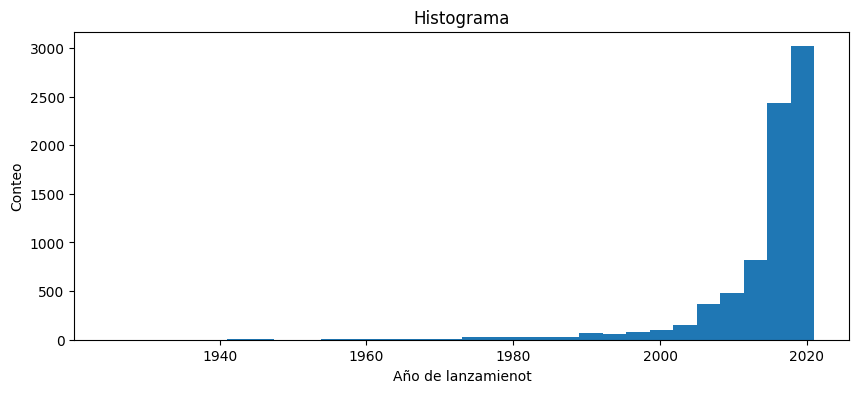

In [22]:
datos= df.release_year

plt.figure(figsize=(10,4))
plt.hist(datos,bins=30)
plt.title('Histograma')
plt.xlabel('Año de lanzamienot')
plt.ylabel('Conteo')
plt.show()

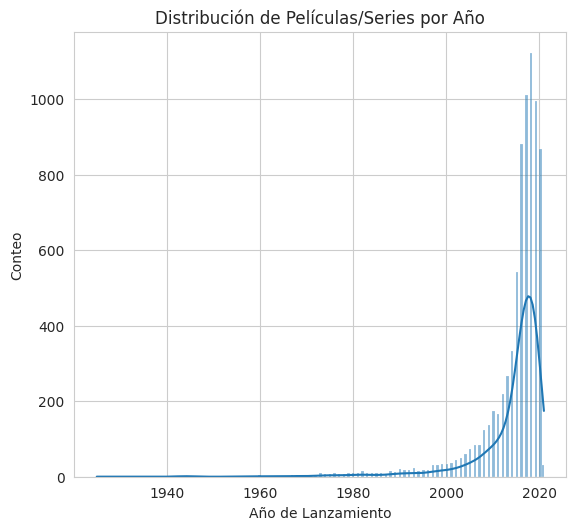

In [23]:
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")

plt.subplot(2, 3, 1)
sns.histplot(df['release_year'], kde=True)
plt.title('Distribución de Películas/Series por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Conteo')
plt.tight_layout()
plt.show()

Se observa como apartir del año 2000 en lo adelante hubo un gran crecimiento en el número de películas que se lanzaron, también que aprox en 2010 hasta el 2020 ha habido un pequeño descremento en los lanzamientos